# IUI - Introduction to SVMs - Example 1
by Sven Mayer
### References
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
* https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_versus_svm_iris.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-versus-svm-iris-py
* https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html

In [15]:
# Scikit-learn, see https://scikit-learn.org
import sklearn
import sklearn.svm
import sklearn.datasets

# Math operations
import numpy as np

# Drawing functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


Creating two clusters with random points on a 2D plain grouped in two classes

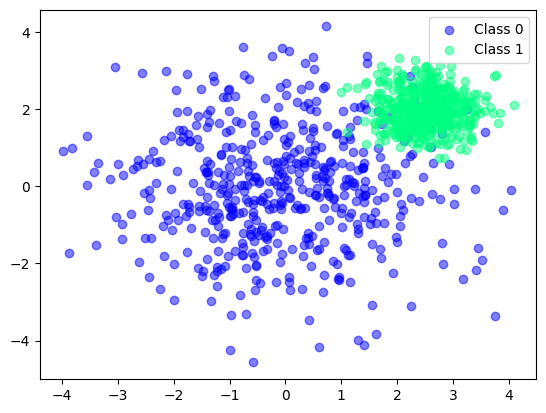

In [16]:
number_of_samples = [500, 500]
centers = [[0.0, 0.0], [2.5, 2.0]]
clusters_std = [1.5, 0.5]
x, y = sklearn.datasets.make_blobs(n_samples=number_of_samples, centers=centers,
                                   cluster_std=clusters_std, shuffle=True,
                                   random_state=0)

plt.scatter(x[y==0][:, 0], x[y==0][:, 1], alpha=0.5, c="blue", label="Class 0")
plt.scatter(x[y==1][:, 0], x[y==1][:, 1], alpha=0.5, c="#00ff80", label="Class 1")
plt.legend()

## Training the first linear SVM 

In [22]:
# use the first i samples
i = 50

#specify the SVMs parameter
classifier = sklearn.svm.SVC(C=10, gamma="scale", kernel="rbf") #gamma=0.1 degree=3

# train the SVM
classifier.fit(x[:i], y[:i])

SVC(C=10)

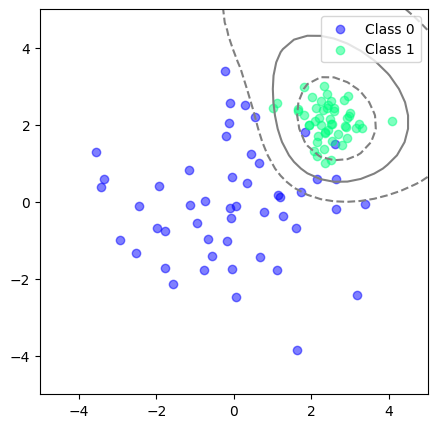

In [23]:
## plot the results
fig, ax = plt.subplots(figsize=(5,5))

plt.scatter(x[y==0][:i, 0], x[y==0][:i, 1], alpha=0.5, c="blue", label="Class 0")
plt.scatter(x[y==1][:i, 0], x[y==1][:i, 1], alpha=0.5, c="#00ff80", label="Class 1")
#plt.scatter(X[:i, 0], X[:i, 1], c=y[:i], alpha=0.5, cmap="winter", label="Data points")


# calculate and plot decision boundary
xx = np.linspace(-5, 5, 30)
yy = np.linspace(-5, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='gray', levels=[-1, 0, 1],  linestyles=['--', '-', '--'])

#plt.savefig("example1.png", dpi=600, bbox_inches = 'tight', pad_inches=0)
plt.legend()
plt.show()

## Taining the SVM with more and more data points - Animation 

In [19]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

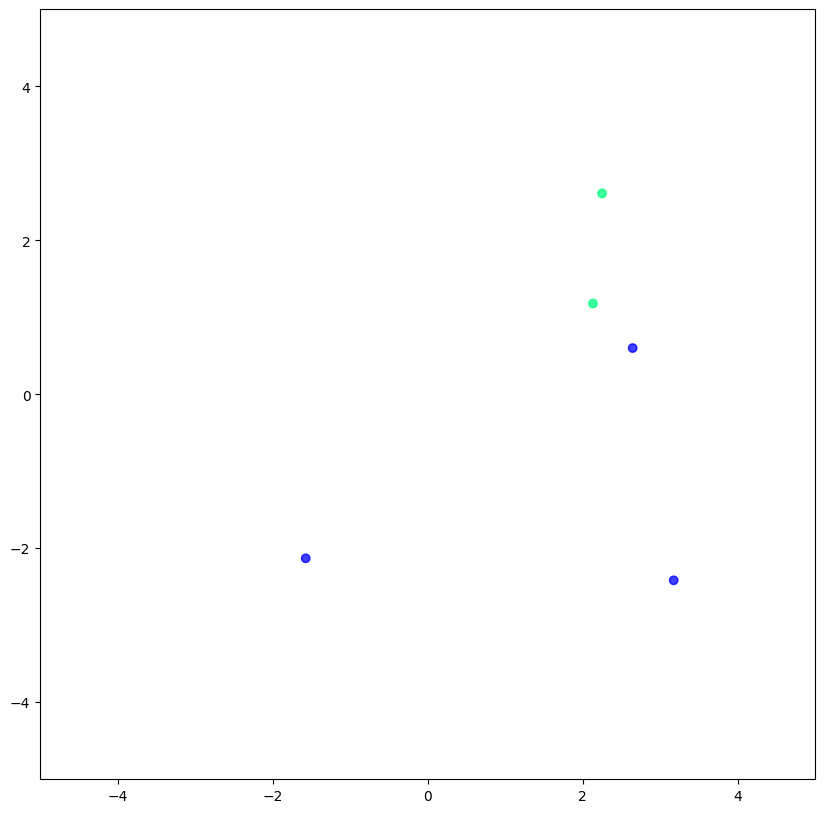

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
def init():
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    scatter = ax.scatter(x[:5, 0], x[:5, 1], c=y[:5], alpha=0.5, cmap="winter", label="Data points")

    return scatter, 

def update(i):
    ax.clear()
    ax.set_title("%i data points" % i)
    classifier = sklearn.svm.SVC(C=10, gamma="scale", kernel="linear") #gamma=0.1 degree=3
    classifier.fit(x[:i], y[:i])
    
    scatter = ax.scatter(x[:i, 0], x[:i, 1], c=y[:i], alpha=0.5, cmap="winter", label="Data points")
    #plt.scatter(X[:i, 0], X[:i, 1], c=y[:i], alpha=0.5, cmap="winter", label="Datapoints")

    
    # create grid to evaluate model
    xx = np.linspace(-5, 5, 30)
    yy = np.linspace(-5, 5, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='gray', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    return scatter,

anim = FuncAnimation(fig, update, frames=np.arange(5, 100), init_func=init, blit=True)


In [21]:
HTML(anim.to_html5_video())

## Training and Test Split 

In [8]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.5, shuffle=True)

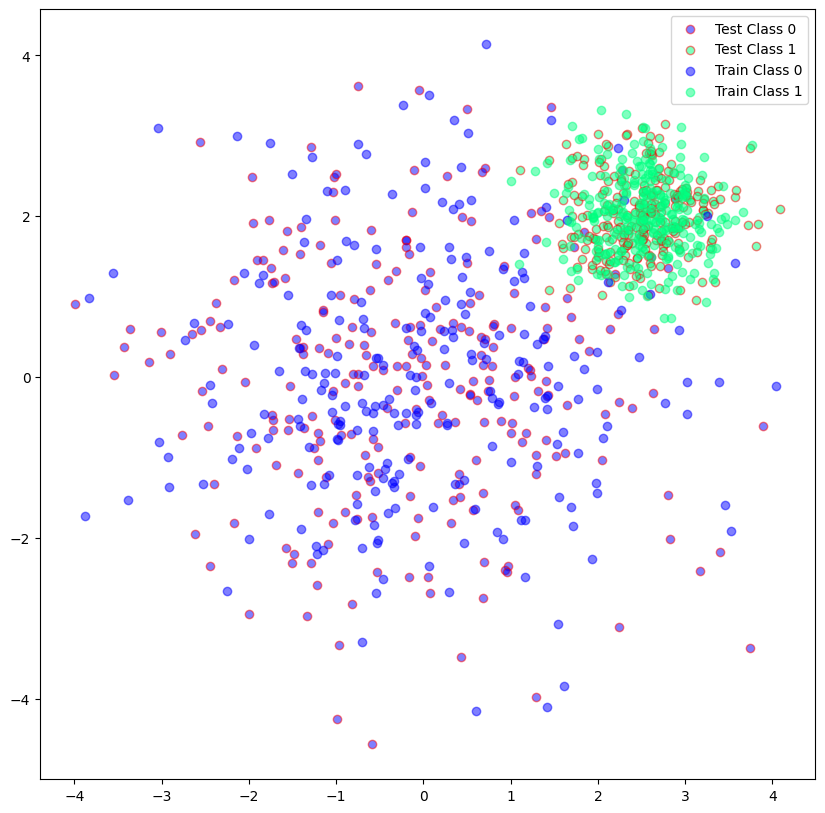

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], alpha=0.5, c="blue", edgecolors="r", label="Test Class 0")
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], alpha=0.5, c="#00ff80", edgecolors="r", label="Test Class 1")
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], alpha=0.5, c="blue", label="Train Class 0")
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], alpha=0.5, c="#00ff80", label="Train Class 1")
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.5, cmap="winter", edgecolors="r")

plt.legend()

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

classifier = sklearn.svm.SVC(C=10, gamma="scale", kernel="linear") #gamma=0.1 degree=3
classifier.fit(X_train, y_train)
classifier

SVC(C=10, kernel='linear')

In [11]:
y_predict = classifier.predict(x)

In [12]:
wrong = x[(y_predict-y) != 0]
print("Accuracy %.1f%%" %((1-len(wrong)/len(x)) * 100))

tmp = X_train[(classifier.predict(X_train)-y_train) != 0]
print("Accuracy Train %.1f%%" %((1-len(tmp)/len(X_train)) * 100))

tmp = X_test[(classifier.predict(X_test)-y_test) != 0]
print("Accuracy Test %.1f%%" %((1-len(tmp)/len(X_test)) * 100))

Accuracy 96.2%
Accuracy Train 96.2%
Accuracy Test 96.2%


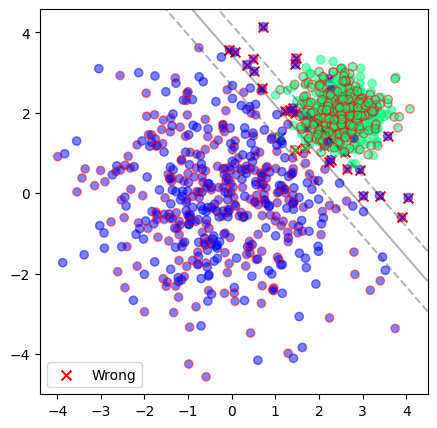

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(wrong[:, 0], wrong[:, 1], c="red", s=50, marker="x", label="Wrong")

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.5, cmap="winter")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5, edgecolors="r", cmap="winter")

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.3, linestyles=['--', '-', '--'])

plt.legend(loc="lower left")

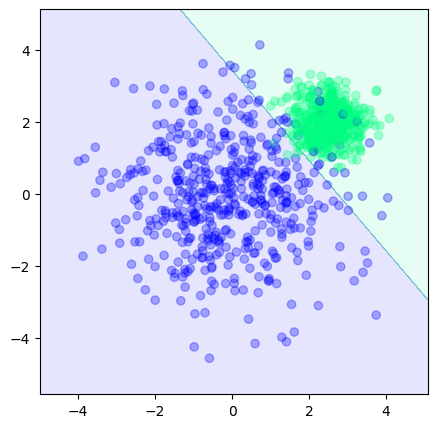

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

X0, X1 = x[:, 0], x[:, 1]
density = .01
xx, yy = np.meshgrid(np.arange(min(X0)-1, max(X0)+1, density), np.arange(min(X1)-1, max(X1)+1, density))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = ax.contourf(xx, yy, Z, cmap="winter", alpha=0.1)

plt.scatter(x[:, 0], x[:, 1], c=y, alpha=.3, cmap="winter")